<a href="https://colab.research.google.com/github/jscriven0218/MakingItInHollywood/blob/main/MakingItInHollywood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HOLLYWOOD, HERE WE COME**

# Business Understanding


Deciding to get into the film industry is a big first step!  It's an exciting new adventure.  Next step is determining what films we'd like to make to be successful!

# Data Understanding

IMDb, the Internet Movie Database, is a website containing all information regarding films, including cast, genres, runtimes, rating and production crew. Starting this new movie studio with a new production crew, we concentrated on the information that we can mimic in our own films - genre and runtimes.

While IMDb records and data can provide instruction on making a movie that audiences love, our company also needs to earn a profit in our new endeavor.  Box Office records for 2010 through 2018 were collected which we will use to accomplish our goal of succeeding in Hollywood.

In [89]:
import numpy as np
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [90]:
!unzip -o im.db.zip
conn = sqlite3.connect('im.db')

Archive:  im.db.zip
  inflating: im.db                   


In [91]:
# wanted to look at the available tables from the IMDB data

IMDB = pd.read_sql("""
SELECT *
FROM sqlite_master
""", conn)

IMDB[IMDB['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [92]:
Box = pd.read_csv('bom.movie_gross.csv')
Box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [93]:
Box['foreign_gross'] = Box['foreign_gross'].str.replace(',','')
Box['foreign_gross'] = Box['foreign_gross'].astype(float)

In [94]:
# create a total_gross so we know the full profits

Box['foreign_gross'] = Box['foreign_gross'].fillna(0)
Box['domestic_gross'] = Box['domestic_gross'].fillna(0)
Box['total_gross_inmil'] = (Box['domestic_gross'] + Box['foreign_gross'])/1000000
Box

,title,studio,domestic_gross,foreign_gross,year,total_gross_inmil
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025.5000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960.3000
3,Inception,WB,292600000.0,535700000.0,2010,828.3000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752.6000
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,0.0062
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,0.0048
3384,El Pacto,Sony,2500.0,0.0,2018,0.0025
3385,The Swan,Synergetic,2400.0,0.0,2018,0.0024


In [95]:
# convert csv of Box Office data to an SQL table

from sqlalchemy import create_engine
engine = create_engine('sqlite:///im.db')
Box.to_sql('Box', engine, index=False, if_exists='replace')

3387

In [96]:
# collecting general information on the tables that appear useful

q = """
SELECT *
FROM movie_basics
"""
Basics = pd.read_sql(q, conn)
Basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [97]:
# want to understand the different genre types

q = """
SELECT DISTINCT genres, COUNT(genres) AS count
FROM movie_basics
GROUP BY genres
ORDER BY count DESC
"""
pd.read_sql(q, conn)

,genres,count
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,Horror,4372
4,"Comedy,Drama",3519
...,...,...
1081,"Action,Animation,History",1
1082,"Action,Animation,Documentary",1
1083,"Action,Animation,Biography",1
1084,"Action,Adventure,Musical",1


# Data Preparation and Analysis

After examining all of the information available, we used the Titles in both the IMDb tables and the Box Office data to pool together the information provided by either source.  Throught the process, we cleaned up the data by dropping unncessary columns, removing rows that contained missing information and, in the genre column, cleaning up the multi-genre groups.

Because the Box Office data had far fewer records (3,387) than IMDb (nearing 150,000), we first checked to see if there was enough relation between the earnings datapoint in the Box Office data and the average rating from IMDb.  Meaning, could we use the rating for those films which we do not have earnings.  While the graph showed a slight skew left, the statistic was not enough to do so.

In [98]:
q = """
SELECT Basics.movie_id, Box.title, total_gross_inmil, runtime_minutes, genres, averagerating
FROM movie_basics AS Basics
JOIN Box AS Box
ON Basics.primary_title = Box.title
JOIN movie_ratings AS Ratings
ON Basics.movie_id = Ratings.movie_id
"""
df_withearnings = pd.read_sql(q, conn)
df_withearnings = df_withearnings.drop_duplicates(subset=['movie_id'])
df_withearnings

,movie_id,title,total_gross_inmil,runtime_minutes,genres,averagerating
0,tt0315642,Wazir,1.100000,103.0,"Action,Crime,Drama",7.1
1,tt0337692,On the Road,8.744000,124.0,"Adventure,Drama,Romance",6.1
2,tt0359950,The Secret Life of Walter Mitty,188.100000,114.0,"Adventure,Comedy,Drama",7.3
3,tt0365907,A Walk Among the Tombstones,53.200000,114.0,"Action,Crime,Drama",6.5
4,tt0369610,Jurassic World,652.301019,124.0,"Action,Adventure,Sci-Fi",7.0
...,...,...,...,...,...,...
3022,tt9392532,Neighbors,270.700000,90.0,"Comedy,Drama",7.6
3023,tt9447594,The Gambler,39.300000,121.0,"Action,Sci-Fi,Thriller",6.1
3024,tt9816988,Gold,14.900000,NaN,Drama,5.2
3025,tt9851050,Sisters,105.000000,NaN,"Action,Drama",4.7


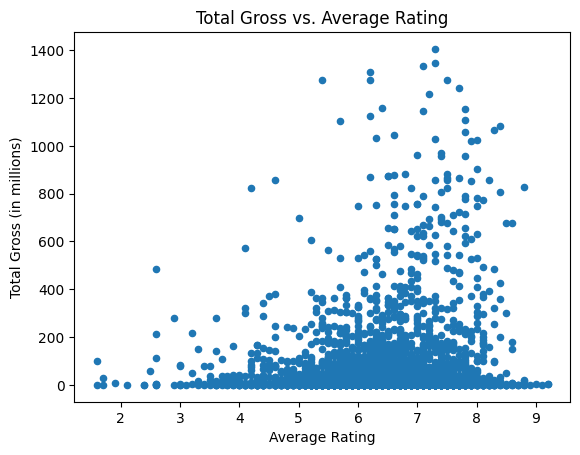

In [99]:
# before using the average rating as a measure of the 'best' films for us to create, since our true goal is to make money, want to determine that there is a positive relationship between total gross earnings and average rating

ax = df_withearnings.plot(x='averagerating', y='total_gross_inmil', kind='scatter')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Total Gross (in millions)')
ax.set_title('Total Gross vs. Average Rating')
plt.show()


In [100]:
results = sm.OLS(df_withearnings['total_gross_inmil'], df_withearnings['averagerating']).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      total_gross_inmil   R-squared (uncentered):                   0.178
Model:                            OLS   Adj. R-squared (uncentered):              0.178
Method:                 Least Squares   F-statistic:                              655.4
Date:                Thu, 29 May 2025   Prob (F-statistic):                   5.19e-131
Time:                        11:23:08   Log-Likelihood:                         -19861.
No. Observations:                3025   AIC:                                  3.972e+04
Df Residuals:                    3024   BIC:                                  3.973e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
averagerating    12.2424      0.478     25.601      0.000      11.305      13.180
==============================================================================
Omnibus:                     2377.207   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41959.987
Skew:                           3.742   Prob(JB):                         0.00
Kurtosis:                      19.640   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
df_withearnings['genres'].value_counts()

,count
genres,
Drama,317
"Comedy,Drama",133
"Comedy,Drama,Romance",132
"Drama,Romance",112
Documentary,110
...,...
"Action,Animation,Crime",1
"Crime,Mystery",1
"Documentary,Mystery",1


In [125]:
print(df_withearnings['genres'].value_counts().sum())

3018


In [154]:
movie_info = df_withearnings.copy()
movie_info

,movie_id,title,total_gross_inmil,runtime_minutes,genres,averagerating
0,tt0315642,Wazir,1.100000,103.0,"Action,Crime,Drama",7.1
1,tt0337692,On the Road,8.744000,124.0,"Adventure,Drama,Romance",6.1
2,tt0359950,The Secret Life of Walter Mitty,188.100000,114.0,"Adventure,Comedy,Drama",7.3
3,tt0365907,A Walk Among the Tombstones,53.200000,114.0,"Action,Crime,Drama",6.5
4,tt0369610,Jurassic World,652.301019,124.0,"Action,Adventure,Sci-Fi",7.0
...,...,...,...,...,...,...
3022,tt9392532,Neighbors,270.700000,90.0,"Comedy,Drama",7.6
3023,tt9447594,The Gambler,39.300000,121.0,"Action,Sci-Fi,Thriller",6.1
3024,tt9816988,Gold,14.900000,NaN,Drama,5.2
3025,tt9851050,Sisters,105.000000,NaN,"Action,Drama",4.7


In [128]:
# at first I tried removing all the movies with more than one genres rather than counting them twice, but we lost too much data

movie_info['genres'] = movie_info['genres'].astype(str).fillna('')
movie_info['genres'] = movie_info['genres'].str.split(',')
movie_info = movie_info.explode('genres')
movie_info

,movie_id,title,total_gross_inmil,runtime_minutes,genres,averagerating
0,tt0315642,Wazir,1.100,103.0,Action,7.1
0,tt0315642,Wazir,1.100,103.0,Crime,7.1
0,tt0315642,Wazir,1.100,103.0,Drama,7.1
1,tt0337692,On the Road,8.744,124.0,Adventure,6.1
1,tt0337692,On the Road,8.744,124.0,Drama,6.1
...,...,...,...,...,...,...
3023,tt9447594,The Gambler,39.300,121.0,Thriller,6.1
3024,tt9816988,Gold,14.900,NaN,Drama,5.2
3025,tt9851050,Sisters,105.000,NaN,Action,4.7
3025,tt9851050,Sisters,105.000,NaN,Drama,4.7


In [129]:
genre_count = movie_info.value_counts('genres')
genre_count = genre_count.sort_values(ascending=False)
genre_count

,count
genres,
Drama,1756
Comedy,926
Action,646
Romance,468
Thriller,452
Adventure,439
Crime,382
Biography,285
Horror,239


In [130]:
low_genres = genre_count[genre_count < 400]
low_genres

,count
genres,
Crime,382
Biography,285
Horror,239
Documentary,227
Mystery,207
Fantasy,170
Animation,152
History,136
Sci-Fi,135


In [131]:
movie_info = movie_info[~movie_info['genres'].isin(low_genres.index)]
movie_info = movie_info[~movie_info['genres'].str.contains('None')]
movie_info = movie_info.dropna(subset=['runtime_minutes'])
movie_info

,movie_id,title,total_gross_inmil,runtime_minutes,genres,averagerating
0,tt0315642,Wazir,1.100,103.0,Action,7.1
0,tt0315642,Wazir,1.100,103.0,Drama,7.1
1,tt0337692,On the Road,8.744,124.0,Adventure,6.1
1,tt0337692,On the Road,8.744,124.0,Drama,6.1
1,tt0337692,On the Road,8.744,124.0,Romance,6.1
...,...,...,...,...,...,...
3021,tt9225192,Unstoppable,167.800,116.0,Action,6.5
3022,tt9392532,Neighbors,270.700,90.0,Comedy,7.6
3022,tt9392532,Neighbors,270.700,90.0,Drama,7.6
3023,tt9447594,The Gambler,39.300,121.0,Action,6.1


In [132]:
genre_rating = movie_info.groupby('genres')['averagerating'].mean()
genre_count = movie_info.value_counts('genres')
genre_earning = movie_info.groupby('genres')['total_gross_inmil'].mean()

genre_info = pd.DataFrame({'rating': genre_rating, 'count': genre_count, 'earnings': genre_earning})
genre_info = genre_info.reset_index()
genre_info

,genres,rating,count,earnings
0,Action,6.284507,639,165.486570
1,Adventure,6.478360,439,272.189938
2,Comedy,6.249510,919,83.706605
3,Drama,6.595329,1734,39.036436
4,Romance,6.343656,465,34.196258
5,Thriller,6.180942,446,77.622487


The data included information on the genre of the movies.  There were many different genres, but we cleaned up the group and concentrated on the top 6 genres, when ranked by sample size.  These 6 genres are Action, Adventure, Comedy, Drama, Romance and Thriller.

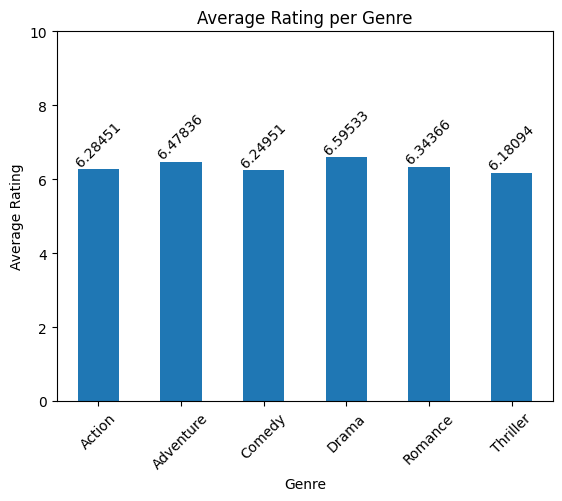

In [156]:
ax = genre_info.plot(x='genres', y='rating', kind='bar', legend=False)
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating per Genre')
plt.bar_label(ax.containers[0], rotation = 45)
plt.xticks(rotation=45)
plt.ylim(0,10)
plt.show()

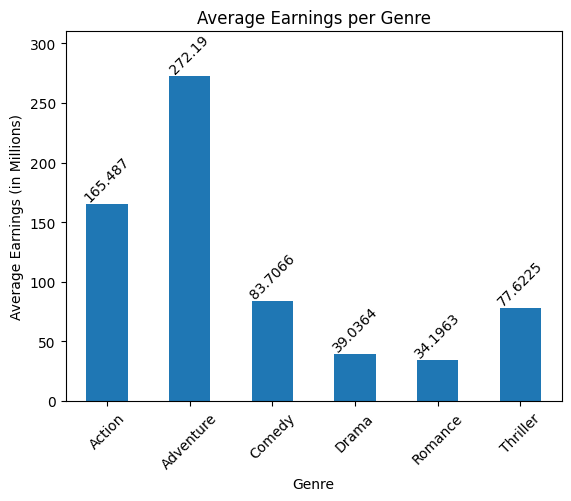

In [157]:
ax = genre_info.plot(x='genres', y='earnings', kind='bar', legend=False)
ax.set_xlabel('Genre')
ax.set_ylabel('Average Earnings (in Millions)')
ax.set_title('Average Earnings per Genre')
plt.bar_label(ax.containers[0], rotation = 45)
plt.xticks(rotation=45)
plt.ylim(0,310)
plt.show()

After looking at the genres, we concentrated on the runtime of the movies to determine if that had an affect on the rating or earnings.

In [137]:
movie_info_runtime = movie_info.copy()
movie_info_runtime

,movie_id,title,total_gross_inmil,runtime_minutes,genres,averagerating
0,tt0315642,Wazir,1.100,103.0,Action,7.1
0,tt0315642,Wazir,1.100,103.0,Drama,7.1
1,tt0337692,On the Road,8.744,124.0,Adventure,6.1
1,tt0337692,On the Road,8.744,124.0,Drama,6.1
1,tt0337692,On the Road,8.744,124.0,Romance,6.1
...,...,...,...,...,...,...
3021,tt9225192,Unstoppable,167.800,116.0,Action,6.5
3022,tt9392532,Neighbors,270.700,90.0,Comedy,7.6
3022,tt9392532,Neighbors,270.700,90.0,Drama,7.6
3023,tt9447594,The Gambler,39.300,121.0,Action,6.1


In [143]:
print(movie_info_runtime['runtime_minutes'].min())
print(movie_info_runtime['runtime_minutes'].max())
print(movie_info_runtime['averagerating'].min())
print(movie_info_runtime['averagerating'].max())
print(movie_info_runtime['total_gross_inmil'].min())
print(movie_info_runtime['total_gross_inmil'].max())

45.0
272.0
1.6
9.2
0.0001
1405.4


In [144]:
runtime_rating = movie_info_runtime.groupby('runtime_minutes')['averagerating'].mean()
runtime_count = movie_info_runtime.value_counts('runtime_minutes')
runtime_earning = movie_info_runtime.groupby('runtime_minutes')['total_gross_inmil'].mean()

runtime_info = pd.DataFrame({'rating': runtime_rating, 'count': runtime_count, 'earnings': runtime_earning})
runtime_info = runtime_info.reset_index()
runtime_info

,runtime_minutes,rating,count,earnings
0,45.0,7.666667,3,3.405333
1,46.0,5.200000,4,0.138075
2,47.0,8.400000,1,8.400000
3,49.0,6.700000,1,1.400000
4,50.0,5.550000,2,82.250000
...,...,...,...,...
119,184.0,7.700000,1,27.800000
120,186.0,8.200000,1,1.600000
121,189.0,7.700000,2,1.300000
122,192.0,8.700000,1,1.072000


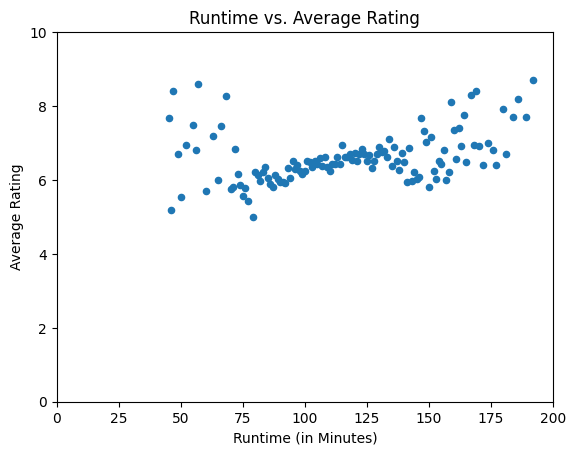

In [159]:
ax = runtime_info.plot(x='runtime_minutes', y='rating', kind='scatter')
ax.set_xlabel('Runtime (in Minutes)')
ax.set_ylabel('Average Rating')
ax.set_title('Runtime vs. Average Rating')
plt.ylim(0,10)
plt.xlim(0,200)
plt.show()

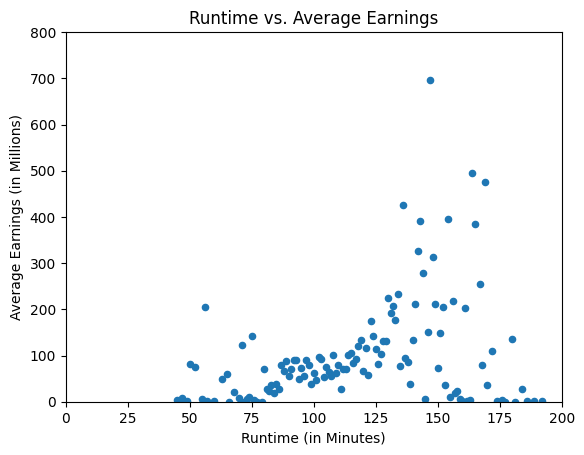

In [158]:
ax = runtime_info.plot(x='runtime_minutes', y='earnings', kind='scatter')
ax.set_xlabel('Runtime (in Minutes)')
ax.set_ylabel('Average Earnings (in Millions)')
ax.set_title('Runtime vs. Average Earnings')
plt.ylim(0,800)
plt.xlim(0,200)
plt.show()

In [148]:
final_withearnings = movie_info_runtime
final_withearnings

,movie_id,title,total_gross_inmil,runtime_minutes,genres,averagerating
0,tt0315642,Wazir,1.100,103.0,Action,7.1
0,tt0315642,Wazir,1.100,103.0,Drama,7.1
1,tt0337692,On the Road,8.744,124.0,Adventure,6.1
1,tt0337692,On the Road,8.744,124.0,Drama,6.1
1,tt0337692,On the Road,8.744,124.0,Romance,6.1
...,...,...,...,...,...,...
3021,tt9225192,Unstoppable,167.800,116.0,Action,6.5
3022,tt9392532,Neighbors,270.700,90.0,Comedy,7.6
3022,tt9392532,Neighbors,270.700,90.0,Drama,7.6
3023,tt9447594,The Gambler,39.300,121.0,Action,6.1


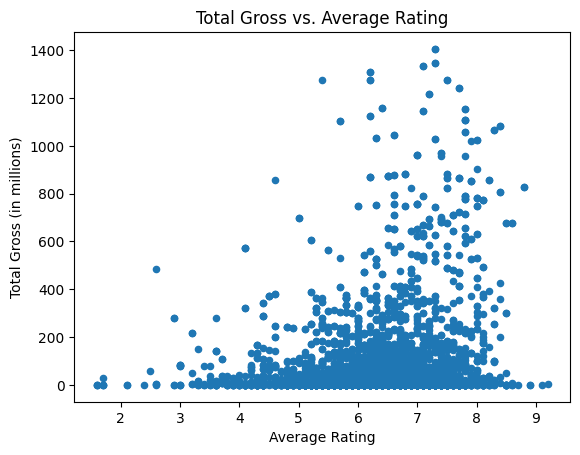

In [149]:
ax = final_withearnings.plot(x='averagerating', y='total_gross_inmil', kind='scatter')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Total Gross (in millions)')
ax.set_title('Total Gross vs. Average Rating')
plt.show()

Finally, we generated an ANOVA table to show the probability that the factors we were examining (Genre and Runtime) are influential on the Earnings.  In line with the graphs above, the ANOVA shows that both factors are highly likely to have an influence on Earnings.

In [151]:
final_withearnings_ANOVA = final_withearnings.drop(columns = ['movie_id', 'title'])

genre_mapping = {
    'Action':1,
    'Adventure':2,
    'Comedy':3,
    'Drama':4,
    'Romance':5,
    'Thriller':6
}

final_withearnings_ANOVA['genres'] = final_withearnings_ANOVA['genres'].map(genre_mapping)
final_withearnings_ANOVA


,total_gross_inmil,runtime_minutes,genres,averagerating
0,1.100,103.0,1,7.1
0,1.100,103.0,4,7.1
1,8.744,124.0,2,6.1
1,8.744,124.0,4,6.1
1,8.744,124.0,5,6.1
...,...,...,...,...
3021,167.800,116.0,1,6.5
3022,270.700,90.0,3,7.6
3022,270.700,90.0,4,7.6
3023,39.300,121.0,1,6.1


In [152]:
formula = 'total_gross_inmil ~ averagerating + runtime_minutes + C(genres)'
model = ols(formula, final_withearnings_ANOVA).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

                       sum_sq      df           F         PR(>F)
C(genres)        2.439440e+07     5.0  169.316473  7.371247e-166
averagerating    4.547359e+06     1.0  157.811374   1.287341e-35
runtime_minutes  2.680479e+06     1.0   93.023244   8.274102e-22
Residual         1.335294e+08  4634.0         NaN            NaN


# Conclusion

As we open this new movie studio, we have two goals on which we will be concentrating: 1. Make a great movie!  The more our films are adored, the better our reputation and opportunity for growth. 2. Earn money.

This analysis lead to the conclusion that genre and runtime do have influence on the average rating and average earnings.  In order to succeed, we have come to the following recommendations:


*   **All genres are loved** As shown in the charts above, when it comes to ratings within IMDb, genres have litte affect.  Any of the top six most rated genres have IMDb user rates between 6.175 and 6.6, which is a small window.
*   **Adventure makes money** For the good of our shareholders, the greater priority in this movie studio is making a profit, so it is a great thing that the top genres are equally rated.  Wtih that, we can concentrate on creating files in genres that have the highest earnings - Adventure and Action
*   **Watch your runtime** Runtime does have an affect on the gross earnings.  Up to a limit, the profit generally grows as the length of the movie increases.  The movie rating appears to have a similar effect.







# Limitations

An assumption we made on the data was that films with more than one genre listed could be placed into both categories. We double count their gross earnings and ratings in the averages.  But, without keeping the information, we lost too large a part of our data.

# Next Steps

Now that we have an idea of which genres and what runtimes will bring us the highest rating and gross earnings, it's time to start comparing within those groups.  

*   **Categories within genres** Adventure movies make the most money, on average, but are the best adventure movies in the superhero category, coming of age films, etc.
*   **Who do we need on our team** are these specific actors or actresses combinations that bring in more money within each genre?  Or do certain writers create the most beloved films?  And are they worth the cost?
